In [70]:
import pandas as pd
import glob
from typing import List
from matplotlib import pyplot as plt
from utils.clean_data import load_csv_files, clean_train_data, clean_items_data

## Loading data

In [30]:
treino_dir = "./data/treino/"
itens_dir = "./data/itens/"

# Carregar dados
treino_files = glob.glob(f"{treino_dir}/*.csv")
itens_files = glob.glob(f"{itens_dir}/*.csv")

# Carregar os dados
df_treino_raw = load_csv_files(treino_files)
df_itens_raw = load_csv_files(itens_files)

In [46]:
df_treino = df_treino_raw.copy()
df_itens = df_itens_raw.copy()

## Analise Inicial - Dados de Treino

In [33]:
# A columa timestasmpHistory_new pode ser removida já que é igual a timestampHistory
(df_treino["timestampHistory"] == df_treino["timestampHistory_new"]).value_counts()

True    577942
Name: count, dtype: int64

In [40]:
df_treino = df_treino.drop(columns=["timestampHistory_new"])

In [35]:
# checando se ha userId duplicados
(
    df_treino.groupby("userId")
    .size()
    .reset_index(name="count")
    .query("count > 1")
)

# podemos perceber que eh uma linha por usuario

,userId,count


In [36]:
# E para cada usuario existem quantidades diferentes de noticias consumidas
df_treino.groupby("historySize").head(1).sort_values("historySize").head(5)

,userId,userType,historySize,history,timestampHistory,numberOfClicksHistory,timeOnPageHistory,scrollPercentageHistory,pageVisitsCountHistory
169,767c0162d43e7b3efafaa89360473992e56d830fd5cb26...,Non-Logged,1,5165b7b8-3988-486d-82ca-e1fff3c1b500,1659749500890,10,20148,69.73,2
0,fbb963d61eb8149e7f43b1bd905457ba5e106a830ddc27...,Non-Logged,2,"80aa7bb2-adce-4a55-9711-912c407927a1, d9e5f15d...","1657908085200, 1659634203762","0, 0","71998, 115232","81.58, 73.36","1, 1"
30,9ad920cb19f5142def60e856579610af12abaabfe08813...,Non-Logged,3,"73151e02-dd2a-4509-968e-b9c16ec1c5db, f2b3cd5d...","1658851324730, 1658851359552, 1658851419499","2, 16, 17","10000, 53232, 110000","19.5, 56.63, 83.96","1, 1, 1"
78,7c2a0de4067411bcd923e146aeb7b69c41a94233a92eea...,Non-Logged,4,"04a6688f-bb07-4dfa-a1bb-432bf540f841, 39155663...","1656678533987, 1656939283245, 1656947131035, 1...","0, 0, 0, 0","10951, 10000, 7473, 64073","12.43, 17.66, 56.48, 51.99","1, 1, 1, 1"
115,2ee29c3b488675d9cb0bf7ec3628b3c2965bc532180334...,Non-Logged,5,"c44af7c6-88e9-4ce2-81d6-7b8adc4e085b, 0906fe9c...","1659150541589, 1659454851970, 1659454935119, 1...","13, 11, 10, 6, 11","47348, 39297, 42652, 21185, 63258","33.36, 36.28, 30.04, 33.0, 36.22","1, 1, 1, 1, 1"


In [26]:
df_treino.head()

,userId,userType,historySize,history,timestampHistory,numberOfClicksHistory,timeOnPageHistory,scrollPercentageHistory,pageVisitsCountHistory
0,fbb963d61eb8149e7f43b1bd905457ba5e106a830ddc27...,Non-Logged,2,"80aa7bb2-adce-4a55-9711-912c407927a1, d9e5f15d...","1657908085200, 1659634203762","0, 0","71998, 115232","81.58, 73.36","1, 1"
1,17f1083e6079b0f28f7820a6803583d1c1b405c0718b11...,Non-Logged,2,"19ba89fc-1e06-4c5d-9c57-4a3088dc0511, e273dba4...","1657111508570, 1657481309920","68, 12","131495, 43733","51.74, 35.49","1, 1"
2,528a8d7a2af73101da8d6709c1ec875b449a5a58749a99...,Non-Logged,2,"59a61a8a-cc52-453f-b1cd-2bd019e9d574, a0562805...","1657823890328, 1660141444328","55, 9","159042, 10336","62.19, 48.28","1, 1"
3,2dd18b58a634a4e77181a202cf152df6169dfb3e4230ef...,Non-Logged,2,"233f8238-2ce0-470f-a9d5-0e0ac530382a, 037155f4...","1656963373076, 1657091888917","0, 0","193579, 20519","31.03, 31.9","1, 1"
4,97e1439d485b0630e12818d3df84ff67d08475ef6ebeb0...,Logged,2,"385044ad-3876-4188-83fa-f560435c1a9c, 2f754502...","1657618607633, 1659536839832","57, 38","220000, 130000","52.65, 53.37","1, 1"


In [42]:
target_user_id = df_treino["userId"].iloc[0]
target_user_id

'fbb963d61eb8149e7f43b1bd905457ba5e106a830ddc27288434101e7252ef57'

In [51]:
df_treino.query("userId == @target_user_id")

,userId,userType,historySize,history,timestampHistory,numberOfClicksHistory,timeOnPageHistory,scrollPercentageHistory,pageVisitsCountHistory,timestampHistory_new
0,fbb963d61eb8149e7f43b1bd905457ba5e106a830ddc27...,Non-Logged,2,"80aa7bb2-adce-4a55-9711-912c407927a1, d9e5f15d...","1657908085200, 1659634203762","0, 0","71998, 115232","81.58, 73.36","1, 1","1657908085200, 1659634203762"


In [50]:
df_exploded = clean_train_data(df_treino)

In [52]:
df_exploded.query("userId == @target_user_id")

,userId,userType,historySize,historyId,timestampHistory,numberOfClicksHistory,timeOnPageHistory,scrollPercentageHistory,pageVisitsCountHistory
0,fbb963d61eb8149e7f43b1bd905457ba5e106a830ddc27...,Non-Logged,2,80aa7bb2-adce-4a55-9711-912c407927a1,2022-07-15 18:01:25.200,0,71998,81.58,1
1,fbb963d61eb8149e7f43b1bd905457ba5e106a830ddc27...,Non-Logged,2,d9e5f15d-b441-4d8b-bee4-462b106d3916,2022-08-04 17:30:03.762,0,115232,73.36,1


In [53]:
df_exploded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8123951 entries, 0 to 8123950
Data columns (total 9 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   userId                   object        
 1   userType                 object        
 2   historySize              int64         
 3   historyId                object        
 4   timestampHistory         datetime64[ns]
 5   numberOfClicksHistory    int64         
 6   timeOnPageHistory        int64         
 7   scrollPercentageHistory  float64       
 8   pageVisitsCountHistory   int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 557.8+ MB


## Analise Inicial - Itens

In [6]:
df_itens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255603 entries, 0 to 255602
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   page      255603 non-null  object
 1   url       255603 non-null  object
 2   issued    255603 non-null  object
 3   modified  255603 non-null  object
 4   title     255603 non-null  object
 5   body      255603 non-null  object
 6   caption   255603 non-null  object
dtypes: object(7)
memory usage: 13.7+ MB


In [56]:
# verificando paginas duplicadas
(
    df_itens.groupby("page")
    .size()
    .reset_index(name="count")
    .query("count > 1")
)

,page,count


In [57]:
df_itens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255603 entries, 0 to 255602
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   page      255603 non-null  object
 1   url       255603 non-null  object
 2   issued    255603 non-null  object
 3   modified  255603 non-null  object
 4   title     255603 non-null  object
 5   body      255603 non-null  object
 6   caption   255603 non-null  object
dtypes: object(7)
memory usage: 13.7+ MB


## Analise dataset final

In [60]:
df_itens = clean_items_data(df_itens_raw)
df_treino = clean_train_data(df_treino_raw)

In [61]:
df = df_treino.merge(df_itens, on="historyId", how="left")

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8123951 entries, 0 to 8123950
Data columns (total 12 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   userId                   object        
 1   userType                 object        
 2   historySize              int64         
 3   historyId                object        
 4   timestampHistory         datetime64[ns]
 5   numberOfClicksHistory    int64         
 6   timeOnPageHistory        int64         
 7   scrollPercentageHistory  float64       
 8   pageVisitsCountHistory   int64         
 9   title                    object        
 10  body                     object        
 11  caption                  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 743.8+ MB


In [64]:
df.isnull().mean()

userId                     0.0
userType                   0.0
historySize                0.0
historyId                  0.0
timestampHistory           0.0
numberOfClicksHistory      0.0
timeOnPageHistory          0.0
scrollPercentageHistory    0.0
pageVisitsCountHistory     0.0
title                      0.0
body                       0.0
caption                    0.0
dtype: float64

<Axes: xlabel='timestampHistory'>

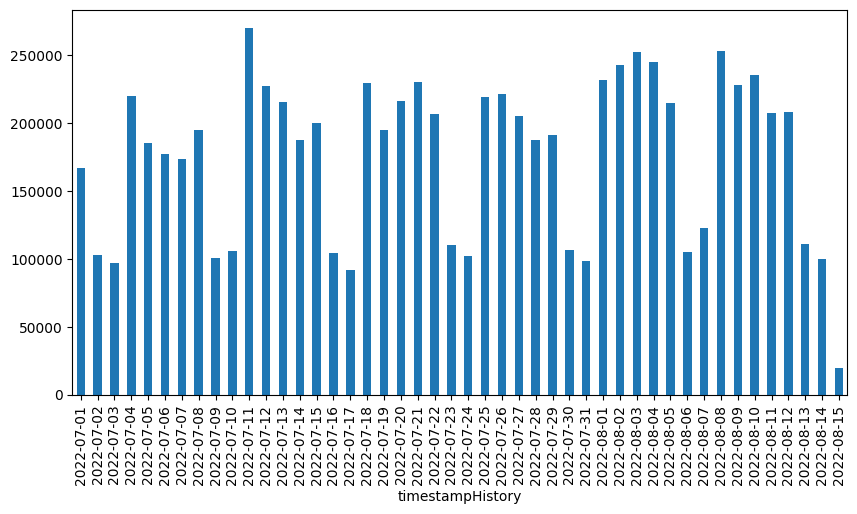

In [63]:
# plotando registros por dia
df["timestampHistory"].dt.date.value_counts().sort_index().plot(kind="bar", figsize=(10, 5))

# podemos observar uma sasonalidade com menor consumo nos finais de semana e uma quantidade estacionaria no "longo prazo"

In [68]:
# Engajamento por tipo de usuario
df.groupby("userType")[["numberOfClicksHistory", "timeOnPageHistory", "scrollPercentageHistory"]].mean()


,numberOfClicksHistory,timeOnPageHistory,scrollPercentageHistory
userType,,,
Logged,12.835719,85826.121607,55.572390
Non-Logged,11.407094,91201.351952,52.710144


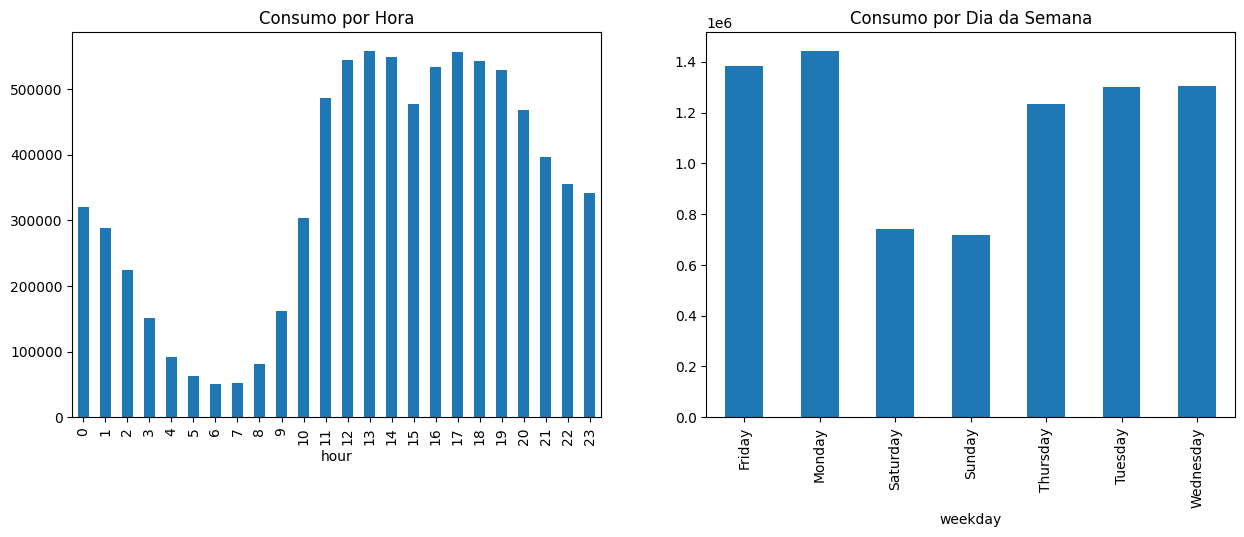

In [75]:
# Entendendo os padrões temporais
df["hour"] = df["timestampHistory"].dt.hour
df["weekday"] = df["timestampHistory"].dt.day_name()

f, ax = plt.subplots(1, 2, figsize=(15, 5))

df.groupby("hour")["historyId"].count().plot(kind="bar", ax=ax[0], title="Consumo por Hora")
df.groupby("weekday")["historyId"].count().plot(kind="bar", ax=ax[1], title="Consumo por Dia da Semana")

plt.show()

In [74]:
# noticias populares
popular_news = df["historyId"].value_counts().head(10)
print(popular_news)

df[df["historyId"].isin(popular_news.index)][["title", "body", "caption"]].drop_duplicates()


historyId
d2593c3d-2347-40d9-948c-b6065e8459a9    25075
f6b5d170-48b9-4f8e-88d4-c84b6668f3bd    22179
1f32787b-de2b-49be-8c20-ddaeae34cc22    19519
f0a78e58-ec7e-494c-9462-fbd6446a9a89    18361
6a83890a-d9e9-4f6b-a6c6-90d031785bbf    18101
855d20b7-53f2-4678-a10f-55402d085018    17105
4c63d7cd-4902-4ffb-9b94-578b1b2151f0    16758
1c27cf97-b20c-4e40-b1f1-288b721517b3    16428
bf257382-74fb-4392-ad6a-143240e39f81    16405
a36c98b5-f159-48f8-9f5a-1fc6ea9956c8    15885
Name: count, dtype: int64


,title,body,caption
22,Diretor da Caixa Econômica Federal é encontrad...,Sede da Caixa Econômica Federal em Brasília.\n...,Sérgio Ricardo Faustino Batista ocupava a dire...
42,Anestesista é preso em flagrante por estupro d...,Vídeo mostra momento em que anestesista estupr...,Giovanni Quintella Bezerra foi filmado por fun...
252,Filha é presa por golpe estimado em R$ 725 mil...,Filha é presa por golpe estimado em R$ 725 mil...,"\nSegundo as investigações, a filha contratou ..."
289,"Jô Soares, ícone do humor e da TV, morre em Sã...",Jô Soares morre aos 84 anos em São Paulo\nO ap...,Apresentador e humorista estava internado no H...
649,"Campeão mundial de jiu-jítsu, Leandro Lo é bal...","Campeão mundial de jiu-jítsu, Leandro Lo é bal...","Segundo o advogado da família, foi confirmada ..."
734,‘Tímido e discreto’: saiba quem era filho de C...,"Ronaldo Ramos Caiado Filho, filho do governado...",Ele é o segundo filho do governador e formado ...
803,Caso Bárbara: suspeito de envolvimento no assa...,Vídeo mostra a menina Bárbara Victória sendo a...,"Causa da morte é apurada. Menina de 10 anos, q..."
1092,Pizzaria recebe PIX falso e entrega refrigeran...,Golpe do Pix: empresa entrega pizza e refriger...,"Com ajuda de funcionários, dono do estabelecim..."
1179,Vídeos mostram diferentes ângulos do ataque ao...,Morte de Shinzo Abe: vídeo mostra momento do a...,Ex-primeiro-ministro foi atingido durante disc...
1255,Vídeo flagra homem atirando na cabeça de vizin...,Homem atira na cabeça de vizinho que limpava c...,"Crime ocorreu neste domingo (24), em Chapadão ..."
